In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Import file
path = r'/Users/jorisjan/Documents/CareerFoundry/Assistance for disabled people in stations - Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned assistance.pkl'))

In [4]:
df.shape

(5409, 19)

In [5]:
df.head()

,year,station_code,station_name,region_sncf,departement,departement_code,zip_code,municipality,longitude,latitude,total_passengers_over_the_year,station_category,service_level,wheelchair_available_in_station,simple_assistance,ramp_assistance,wheelchair_assistance,ramp_and_wheelchair_assistance,total_assistance
0,2015,87111849,Marne-la-Vallee Chessy,REGION DE PARIS-SUD-EST,Seine-et-Marne,77,77700,Chessy,2.782720,48.869856,5443822,3,1,1,3677,2081,78,9357,15193
1,2015,87113001,Paris Est,REGION DE PARIS-EST,Paris,75,75010,Paris,2.358424,48.876742,34919689,3,1,1,3610,2946,161,11133,17850
2,2015,87116582,Chateau-Thierry,REGION DE PARIS-EST,Aisne,02,02400,Chateau-Thierry,3.409514,49.038224,1924022,2,2,1,29,5,0,149,183
3,2015,87118000,Troyes,REGION CHAMPAGNE-ARDENNE,Aube,10,10014,Troyes,4.065281,48.296069,1001917,3,2,1,72,145,7,518,742
4,2015,87118158,Romilly-sur-Seine,REGION DE PARIS-EST,Aube,10,10100,Romilly-sur-Seine,3.728887,48.514433,306218,2,3,0,25,45,0,113,183


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             5409 non-null   int64  
 1   station_code                     5409 non-null   string 
 2   station_name                     5409 non-null   object 
 3   region_sncf                      5409 non-null   object 
 4   departement                      5409 non-null   object 
 5   departement_code                 5409 non-null   object 
 6   zip_code                         5409 non-null   object 
 7   municipality                     5409 non-null   object 
 8   longitude                        5409 non-null   float64
 9   latitude                         5409 non-null   float64
 10  total_passengers_over_the_year   5409 non-null   int64  
 11  station_category                 5409 non-null   int64  
 12  service_level       

In [7]:
# Create a data frame with just the columns we need (removing categorical variables since they can’t be included in k-means tasks)
df_reduced = df[['station_code','year','departement_code','total_passengers_over_the_year','simple_assistance','ramp_assistance','wheelchair_assistance','ramp_and_wheelchair_assistance','total_assistance']]
df_reduced.head()

,station_code,year,departement_code,total_passengers_over_the_year,simple_assistance,ramp_assistance,wheelchair_assistance,ramp_and_wheelchair_assistance,total_assistance
0,87111849,2015,77,5443822,3677,2081,78,9357,15193
1,87113001,2015,75,34919689,3610,2946,161,11133,17850
2,87116582,2015,02,1924022,29,5,0,149,183
3,87118000,2015,10,1001917,72,145,7,518,742
4,87118158,2015,10,306218,25,45,0,113,183


### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_reduced).score(df_reduced) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

[-6.539578250952412e+17,
 -2.119536345573806e+17,
 -1.2407014074702482e+17,
 -5.000354338222406e+16,
 -2.528151045833425e+16,
 -1.5473446364432828e+16,
 -1.1082650955159876e+16,
 -8536141818221922.0,
 -7079998953616689.0]

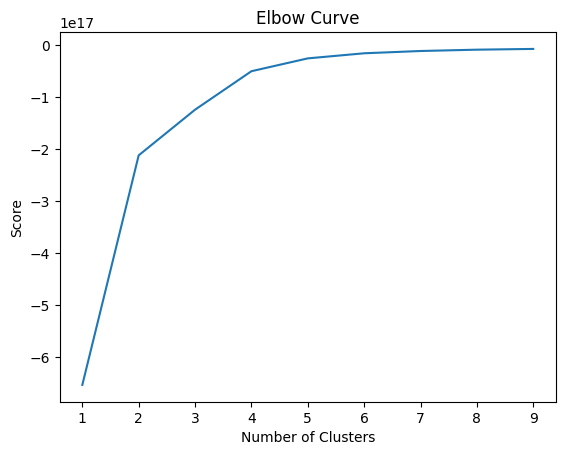

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [11]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data.
kmeans.fit(df_reduced)

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [13]:
df_reduced['clusters'] = kmeans.fit_predict(df_reduced)

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/dt/sqcrp8bd1cx8p99whrf_c9wr0000gn/T/ipykernel_88753/1748436625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['clusters'] = kmeans.fit_predict(df_reduced)


In [14]:
df_reduced.head()

,station_code,year,departement_code,total_passengers_over_the_year,simple_assistance,ramp_assistance,wheelchair_assistance,ramp_and_wheelchair_assistance,total_assistance,clusters
0,87111849,2015,77,5443822,3677,2081,78,9357,15193,0
1,87113001,2015,75,34919689,3610,2946,161,11133,17850,3
2,87116582,2015,02,1924022,29,5,0,149,183,0
3,87118000,2015,10,1001917,72,145,7,518,742,0
4,87118158,2015,10,306218,25,45,0,113,183,0


In [15]:
df_reduced['clusters'].value_counts()

clusters
0    5170
3     216
2      17
1       6
Name: count, dtype: int64

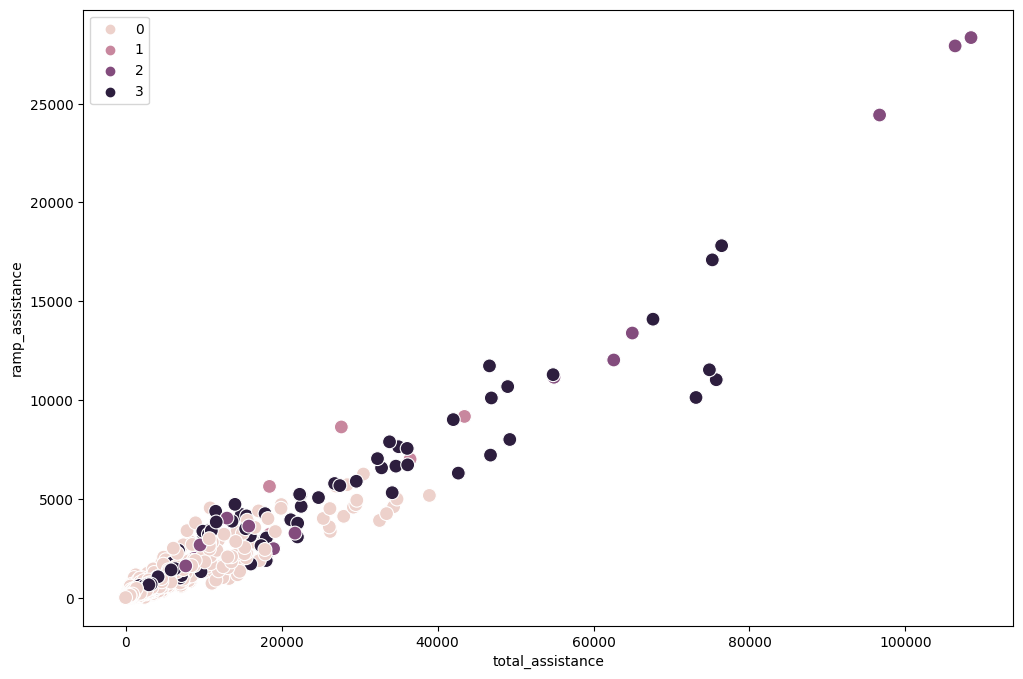

In [16]:
# Plot the clusters for the "ramp_assistance" and "total_assistance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_reduced['total_assistance'], y=df_reduced['ramp_assistance'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('total_assistance')
plt.ylabel('ramp_assistance')
plt.show()

The clustering observed in the plot do not seems to make sense,It's possible that the clusters are influenced by variables not included in the plot, such as station category, geographic location, or specific services offered at each station.

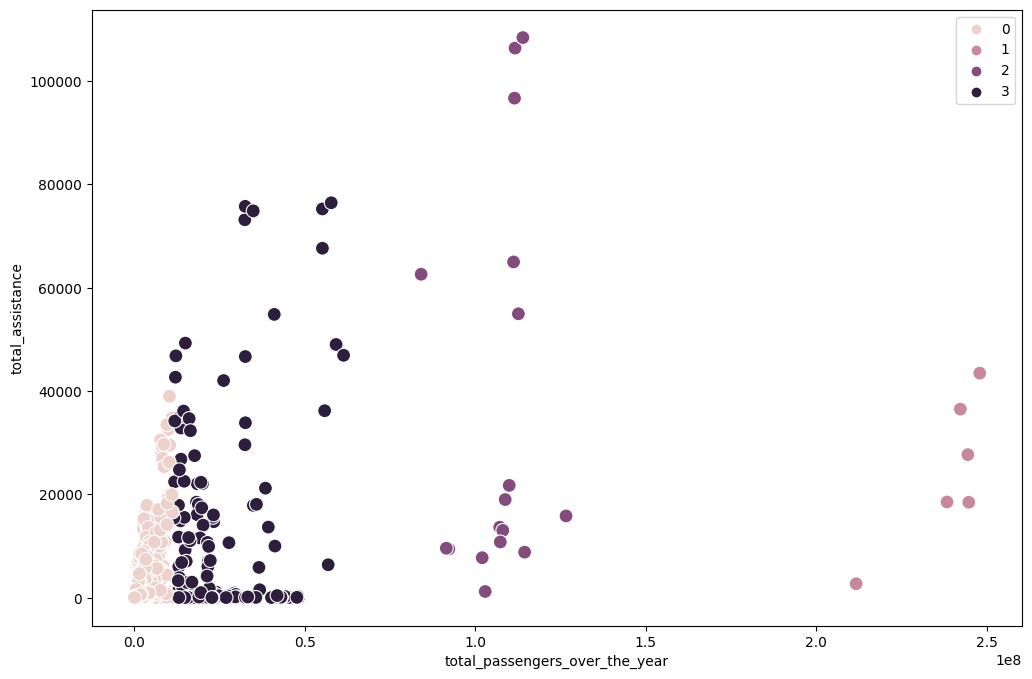

In [17]:
# Plot the clusters for the "total_assistance" and "total_passengers_over_the_year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_reduced['total_passengers_over_the_year'], y=df_reduced['total_assistance'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('total_passengers_over_the_year')
plt.ylabel('total_assistance')
plt.show()

**Correlation Between Passengers and Assistance:**
It is logical to expect that stations with a higher number of passengers over the year would generally need to provide more total assistance. The clusters seem to show this relationship, with higher total passenger counts associated with higher levels of total assistance.

**Cluster Distribution:**
The clusters with lower 'total_passengers_over_the_year' and 'total_assistance' are likely to represent smaller or rural stations where the passenger volume is lower, and therefore, the need for assistance services is less frequent.
Conversely, the clusters with higher values for both variables likely represent larger, urban stations where the passenger volume is high, necessitating more assistance services.

**High Variability in Larger Stations:**
There seems to be greater variability in the 'total_assistance' at higher passenger volumes, which could be due to differences in the infrastructure, availability of services, and the specific needs of passengers at these stations.

**Outliers:**
The data points that are outliers with respect to the larger clusters, especially those with very high 'total_passengers_over_the_year' but varying levels of 'total_assistance', could represent very large urban stations where assistance needs are not solely driven by passenger volume. These stations might have other factors influencing the level of assistance required, such as the effectiveness of the station layout, the efficiency of assistance services, or the demographics of the passengers using the station.

In [18]:
df_reduced.loc[df_reduced['clusters'] == 0, 'cluster'] = 'light pink'
df_reduced.loc[df_reduced['clusters'] == 1, 'cluster'] = 'pink'
df_reduced.loc[df_reduced['clusters'] == 2, 'cluster'] = 'purple'
df_reduced.loc[df_reduced['clusters'] == 3, 'cluster'] = 'dark purple'

/var/folders/dt/sqcrp8bd1cx8p99whrf_c9wr0000gn/T/ipykernel_88753/3574016749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.loc[df_reduced['clusters'] == 0, 'cluster'] = 'light pink'


In [19]:
df_reduced.groupby('cluster').agg({'total_passengers_over_the_year':['mean', 'median'], 
                                    'simple_assistance':['mean', 'median'], 
                                    'ramp_assistance':['mean', 'median'],
                                    'wheelchair_assistance':['mean', 'median'],
                                    'ramp_and_wheelchair_assistance':['mean', 'median'],
                                    'total_assistance':['mean', 'median']})

total_passengers_over_the_year              simple_assistance  \
                                      mean       median              mean   
cluster                                                                     
dark purple                   2.167055e+07   17683842.0       2497.143519   
light pink                    1.380379e+06     540816.0        267.915861   
pink                          2.382501e+08  243369333.5       5821.000000   
purple                        1.068350e+08  108771941.0       8982.000000   

                    ramp_assistance         wheelchair_assistance          \
             median            mean  median                  mean  median   
cluster                                                                     
dark purple    36.5     1693.587963    81.0           1172.759259     1.0   
light pink     20.0      156.640232    12.0             85.372534     2.0   
pink         6044.0     5722.333333  6317.0           3226.833333  1314.5   
purple       5282.0     8506.823529  3263.0           6497.882353  2774.0   

            ramp_and_wheelchair_assistance         total_assistance           
                                      mean  median             mean   median  
cluster                                                                       
dark purple                    2890.328704     2.0      8253.819444    164.5  
light pink                      320.236750     1.0       830.165377     64.0  
pink                           9767.500000  5795.0     24537.666667  23085.0  
purple                        12749.000000   395.0     36735.705882  15802.0

In [22]:
df['departement_code'] = df['departement_code'].astype('string')

In [23]:
# Exporting data to .csv
df_reduced.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cluster assistance.csv'))
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'final assistance.csv'))

#### Clusters:

**Light Pink Cluster:**
* This cluster represents stations with much lower passenger volumes on average and a median that's significantly lower than the mean, indicating that most stations in this cluster are on the smaller side.
* The assistance numbers are low, which makes sense given the lower passenger volumes.
* The mean and median values are close together in this cluster, suggesting a uniform distribution of assistance services and possibly a consistent level of service among these stations.

**Dark Purple Cluster:**
* This cluster has a high average and median number of passengers over the year, suggesting it represents larger, busier stations.
* The mean and median values for 'simple_assistance' and 'ramp_assistance' are relatively high, but there's a significant difference between mean and median, indicating the presence of outliers or a non-uniform distribution of values.
* 'Wheelchair_assistance' and 'ramp_and_wheelchair_assistance' have low median values compared to the mean, reinforcing the idea of a skewed distribution, likely due to a few stations with exceptionally high assistance numbers.
* The 'total_assistance' shows a large discrepancy between mean and median, suggesting variability within this cluster, possibly due to the different sizes and capabilities of the stations within this category.

**Purple Cluster:**
* This cluster has a very high average and median passenger volume, though not as high as the pink cluster.
* The assistance service values are very high, with mean numbers exceeding those in the dark purple and light pink clusters, which is consistent with the high passenger volumes.
* The large difference between mean and median for 'total_assistance' and other assistance types indicates the presence of outliers, which may be due to some exceptionally large stations skewing the average upwards.

**Pink Cluster:**
* The pink cluster stands out with the highest average and median passenger volume, suggesting these stations are the largest and busiest.
* The medians for all types of assistance are the highest among all clusters, reflecting the high demand for assistance services in these stations.
* There's less discrepancy between mean and median values in this cluster compared to the dark purple cluster, which could indicate a more homogeneous group of stations in terms of size and service needs.

#### Findings and Implications:

The statistics suggest a clear positive relationship between passenger volumes and the provision of assistance services.
There is a significant variability within clusters, especially in the dark purple and purple clusters, likely due to the heterogeneous nature of these stations.
The discrepancies between the mean and median values in the dark purple and purple clusters suggest the presence of outlier stations with either exceptionally high passenger volumes or assistance numbers, or both.
The light pink cluster seems to represent smaller stations with a more uniform distribution of assistance services.
The pink cluster represents the largest stations with the highest demand for assistance services, and it appears to be a relatively homogeneous group in terms of service provision.

To gain a deeper understanding of the assistance service provision across the network, it would be beneficial to consider additional factors that might influence these numbers, such as station layout, accessibility features, staff availability, and station policies. Additionally, understanding the reasons behind the outliers in the dark purple and purple clusters could be critical for targeted improvements in the provision of assistance services.

The descriptive statistics for the clusters can be useful for several future steps in an analytics pipeline, including:

- **Resource Allocation:** Direct resources and support to stations with the highest need for assistance services, as indicated by the clusters with higher averages and outliers.
- **Predictive Modeling:** Develop models to forecast future assistance needs based on observed trends in passenger volumes and assistance services.
- **Service Optimization:** Identify stations where the provision of assistance services may be improved, ensuring efficient use of resources and enhancing passenger satisfaction.
- **Infrastructure Planning:** Use cluster data to prioritize infrastructure investments, such as accessibility upgrades in stations with high passenger volumes.
- **Policy and Strategy Development:** Inform policy decisions to ensure equitable service across all stations and tailor strategies for different station categories based on their specific needs.

These insights can guide both operational improvements and strategic planning, leading to better service provision and improved accessibility for passengers requiring assistance.
